In [1]:
!pip install requests
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install lxml


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
url = "https://www.worldometers.info/coronavirus/"

In [3]:
import requests

In [4]:
html_content = requests.get(url).content

In [5]:
type(html_content)

bytes

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(html_content, 'html.parser')

In [8]:
table = soup.find('tbody')

In [9]:
tr = table.find_all('tr')

In [10]:
tr[1]

<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>213,721,086</td>
<td>+14,979</td>
<td>1,533,569</td>
<td>+24</td>
<td>198,257,266</td>
<td>+23,319</td>
<td>13,930,251</td>
<td>15,628</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [11]:
tr[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">104,803,151</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,140,401                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">102,112,345</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">1,550,405</td>
<td style="font-weight: bold; text-align:right">2,833</td>
<td style="font-weight: bold; text-align:right">313,027</td>
<td style="font-weight: bold; text-align:right">3,406</td>
<td style="font-weight: bold; text-align:right">1,162,076,260</td>
<td style="font-weight: bold; text-align:right">3,4

In [12]:
all_data = []
for i in range(8, len(tr)):
    country = []
    td = tr[i].find_all('td')
    for td_cell in td:
        country.append(td_cell.text)
    all_data.append(country)

In [13]:
all_data[0]

['1',
 'USA',
 '104,803,151',
 '',
 '1,140,401                                ',
 '',
 '102,112,345',
 '',
 '1,550,405',
 '2,833',
 '313,027',
 '3,406',
 '1,162,076,260',
 '3,470,902',
 '334,805,269 ',
 'North America',
 '3',
 '294',
 '0',
 '',
 '',
 '4,631']

In [14]:
map(lambda x: x[1:5], all_data)

In [15]:
clean_data = list(map(lambda x: x[1:5], all_data))

In [16]:
column_name = ['country', 'total cases', 'new cases', 'total death']

In [17]:
import pandas as pd

In [21]:
# add column to dataframe
df = pd.DataFrame(clean_data, columns = column_name)

In [22]:
df.head()

,country,total cases,new cases,total death
0,USA,"104,803,151",,"1,140,401"
1,India,"44,684,274",,"530,753"
2,France,"39,570,475",,"164,622"
3,Germany,"37,949,446",,"166,999"
4,Brazil,"36,953,492",,"697,762"


In [23]:
df.tail()

,country,total cases,new cases,total death
226,Vatican City,29,,
227,Western Sahara,10,,1
228,MS Zaandam,9,,2
229,Tokelau,5,,
230,China,"503,302",,"5,272"


In [24]:
# convert dataframe to csv fole

In [25]:
df.to_csv('covid.csv', index = False) # csv-- comma separated valu,

# How to read csv file in pandas

In [26]:
df = pd.read_csv('covid.csv')

In [27]:
df.head()

,country,total cases,new cases,total death
0,USA,"104,803,151",NaN,"1,140,401"
1,India,"44,684,274",NaN,"530,753"
2,France,"39,570,475",NaN,"164,622"
3,Germany,"37,949,446",NaN,"166,999"
4,Brazil,"36,953,492",NaN,"697,762"


In [29]:
df.shape # 231 rows 4 columns

(231, 4)

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
# How to access column in dataframe
df['new cases']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
226    NaN
227    NaN
228    NaN
229    NaN
230    NaN
Name: new cases, Length: 231, dtype: object

In [33]:
type(df['new cases'][0]) # NaN is missing data -- type float

float

In [34]:
True + True

2

In [35]:
False + True

1

In [36]:
False + False

0

In [38]:
df.head()

,country,total cases,new cases,total death
0,USA,"104,803,151",NaN,"1,140,401"
1,India,"44,684,274",NaN,"530,753"
2,France,"39,570,475",NaN,"164,622"
3,Germany,"37,949,446",NaN,"166,999"
4,Brazil,"36,953,492",NaN,"697,762"


In [39]:
df.isna() # sodhxa each cell missing ho ki nai

,country,total cases,new cases,total death
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
226,False,False,True,False
227,False,False,True,False
228,False,False,True,False
229,False,False,True,False


In [40]:
df.isna().sum() # sum happens column wise

country          0
total cases      0
new cases      228
total death      0
dtype: int64

# new cases has 228 rows missing

Matplotlib is building the font cache; this may take a moment.


<Axes: >

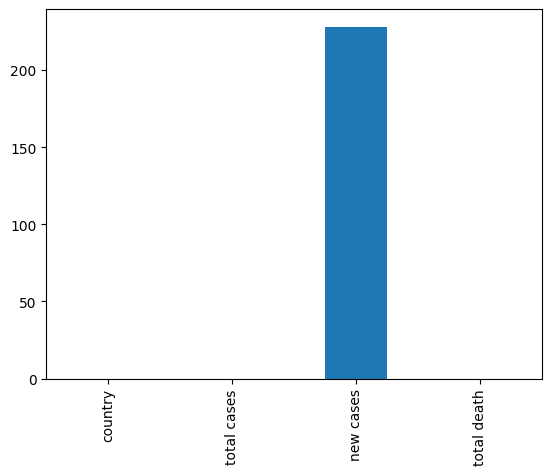

In [41]:
df.isna().sum().plot.bar()

<Axes: >

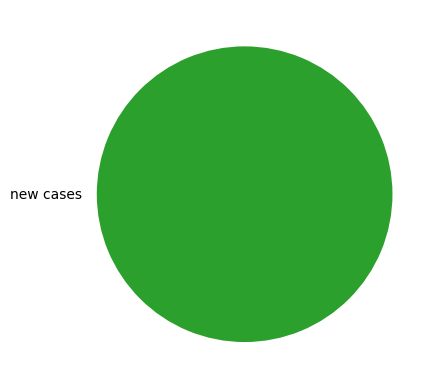

In [42]:
df.isna().sum().plot.pie()

In [43]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new cases,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
total death,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
import seaborn as sns

<Axes: >

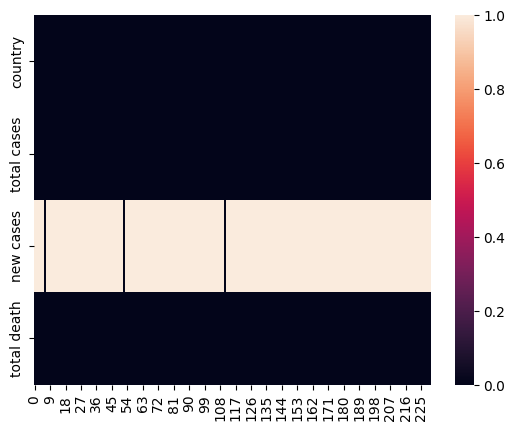

In [45]:
sns.heatmap(df.isna().transpose())

# Nepal ko data 

In [47]:
df[df['country'] == 'Nepal']

,country,total cases,new cases,total death
72,Nepal,"1,001,118",NaN,"12,020"


In [48]:
df[df['country'] == 'India']

,country,total cases,new cases,total death
1,India,"44,684,274",NaN,"530,753"


In [49]:
df[df['country'] == 'China']

,country,total cases,new cases,total death
230,China,"503,302",NaN,"5,272"


In [51]:
df[df['total cases'] == '10']

,country,total cases,new cases,total death
227,Western Sahara,10,NaN,1


In [52]:
df[df['total cases'] == '10']['country'].values

array(['Western Sahara'], dtype=object)

# Line plot

In [53]:
import matplotlib.pyplot as plt

In [54]:
growth = [2, 3, 2.5, 5, 7, 9]

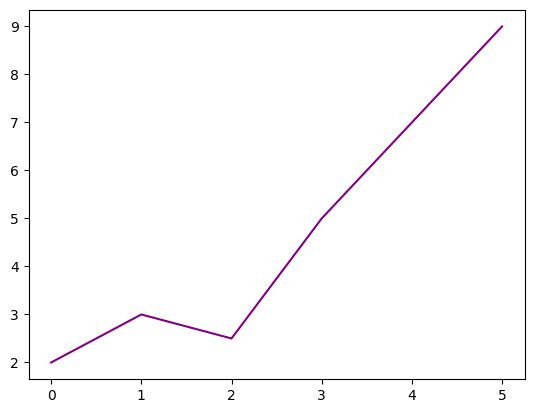

In [56]:
plt.plot(growth, color = 'purple')

Text(0.5, 1.0, 'Growth % in each month')

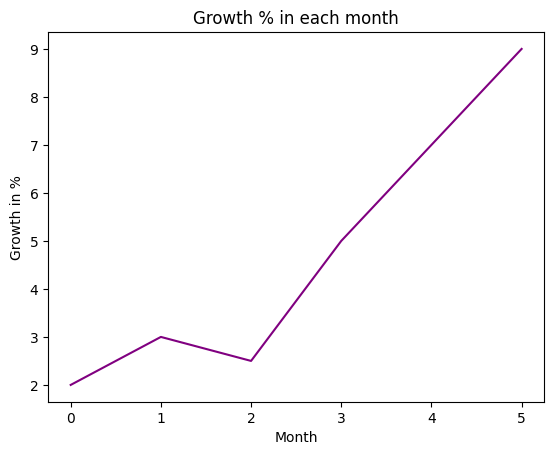

In [58]:
plt.plot(growth, color = 'purple')
plt.xlabel("Month")
plt.ylabel("Growth in %")
plt.title('Growth % in each month')

Text(0.5, 1.0, 'Growth % in each month')

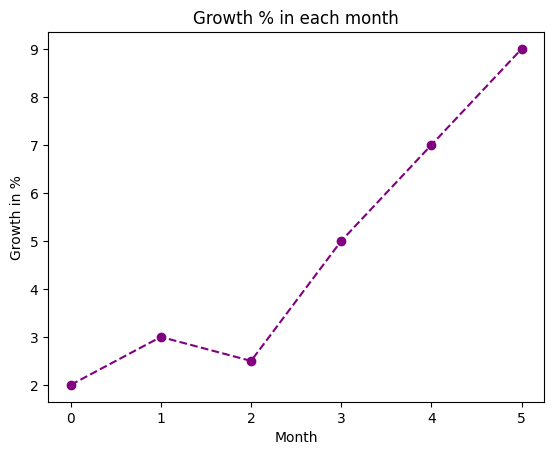

In [61]:
plt.plot(growth, 'o--', color = 'purple')
plt.xlabel("Month")
plt.ylabel("Growth in %")
plt.title('Growth % in each month')